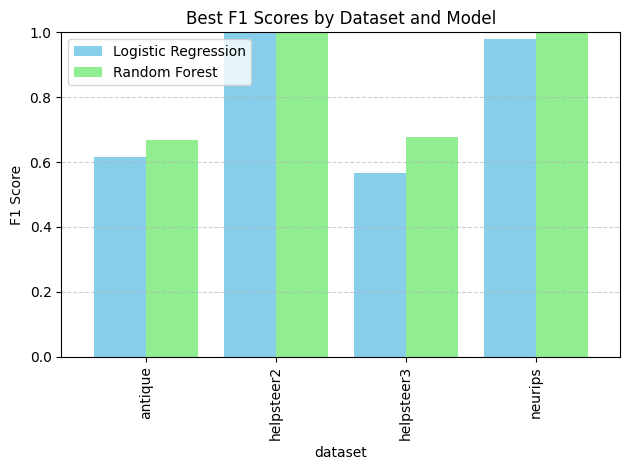

In [187]:
import matplotlib.pyplot as plt
import pandas as pd

metrics = pd.read_json('metrics.json')

random_forest_samples = metrics[metrics['mlmodel'] == 'Random Forest']
logistic_regression_samples = metrics[metrics['mlmodel'] == 'Logistic Regression']

random_forest_results = random_forest_samples.loc[random_forest_samples.groupby('dataset')['f1_score'].idxmax()]
logistic_regression_results = logistic_regression_samples.loc[logistic_regression_samples.groupby('dataset')['f1_score'].idxmax()]

df_results = pd.DataFrame({
    'Logistic Regression': logistic_regression_results.set_index('dataset')['f1_score'],
    'Random Forest': random_forest_results.set_index('dataset')['f1_score'],
})

ax = df_results.plot(kind='bar', width=0.8, color=['skyblue', 'lightgreen'])
ax.set_title('Best F1 Scores by Dataset and Model')
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


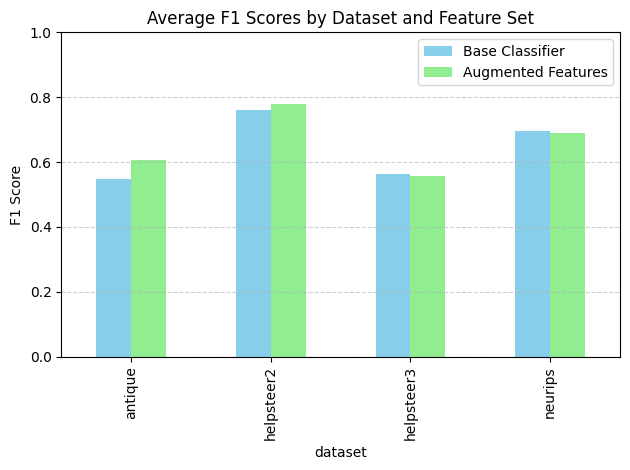

In [188]:
base = metrics[metrics['run_metadata'].apply(lambda x: x.get('type') == 'base classifier')]
aug = metrics[metrics['run_metadata'].apply(lambda x: x.get('type') == 'augmented features')]

base_results = base.groupby('dataset')['f1_score'].mean()
aug_results = aug.groupby('dataset')['f1_score'].mean()

df_results = pd.DataFrame({
    'Base Classifier': base_results,
    'Augmented Features': aug_results
}).fillna(0)

ax = df_results.plot(kind='bar', color=['skyblue', 'lightgreen'])
ax.set_title('Average F1 Scores by Dataset and Feature Set')
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


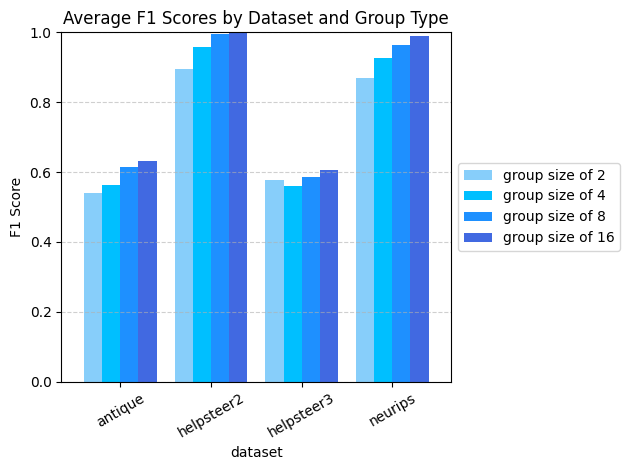

In [189]:
metrics['type'] = metrics['run_metadata'].apply(lambda x: x.get('type') if isinstance(x, dict) else None)

subset = metrics[metrics['type'].str.contains('group size of', case=False, na=False)]

group_results = subset.groupby(['dataset', 'type'])['f1_score'].mean().unstack(fill_value=0)

order = ['group size of 2', 'group size of 4', 'group size of 8', 'group size of 16']
existing_cols = [c for c in order if c in group_results.columns]
group_results = group_results[existing_cols]

ax = group_results.plot(kind='bar', width=0.8, color=['lightskyblue', 'deepskyblue', 'dodgerblue', 'royalblue'])
ax.set_title('Average F1 Scores by Dataset and Group Type')
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


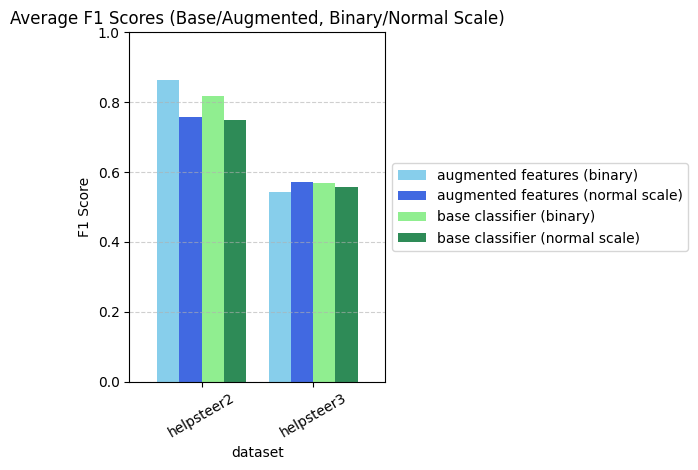

In [190]:
metrics['rating_scale'] = metrics['run_metadata'].apply(lambda x: x.get('rating_scale') if isinstance(x, dict) else None)

subset = metrics[
    ((metrics['rating_scale'].isna()) | (metrics['rating_scale'] == 'binary')) &
    (~metrics['type'].str.contains('group size', case=False, na=False)) &
    (metrics['dataset'].isin(['helpsteer2', 'helpsteer3']))
].copy()

def make_label(row):
    scale = 'normal scale' if pd.isna(row['rating_scale']) else row['rating_scale']
    return f"{row['type']} ({scale})"

subset['group_label'] = subset.apply(make_label, axis=1)

group_results = subset.groupby(['dataset', 'group_label'])['f1_score'].mean().unstack(fill_value=0)

ax = group_results.plot(kind='bar', width=0.8, color=['skyblue', 'royalblue', 'lightgreen', 'seagreen'])
ax.set_title('Average F1 Scores (Base/Augmented, Binary/Normal Scale)')
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

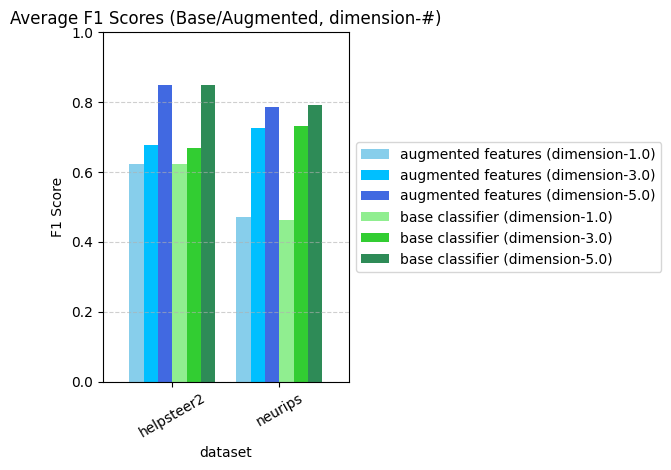

In [191]:
metrics['dimension'] = metrics['run_metadata'].apply(lambda x: x.get('dimension') if isinstance(x, dict) else None)

subset = metrics[
    (metrics['dimension'].isna() == False) &
    (metrics['dataset'].isin(['helpsteer2', 'neurips']))
].copy()

def make_label(row):
    scale = 'dimension-' + str(row['dimension'])
    return f"{row['type']} ({scale})"

subset['group_label'] = subset.apply(make_label, axis=1)

group_results = subset.groupby(['dataset', 'group_label'])['f1_score'].mean().unstack(fill_value=0)

ax = group_results.plot(kind='bar', width=0.8, color=['skyblue', 'deepskyblue', 'royalblue', 'lightgreen', 'limegreen', 'seagreen'])
ax.set_title('Average F1 Scores (Base/Augmented, dimension-#)')
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()